<a href="https://colab.research.google.com/github/a-dhingra/JupyterNotebooks/blob/master/KeithGalli_SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, time, sys
import seaborn as sns
print('Setup Complete')

Setup Complete


In [5]:
sample_data_link = r'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'


In [42]:
import calendar
df = pd.DataFrame() # creating empty dataframe

for x in range(1,13): # reading different files and concatenating them
  temp = pd.read_csv(f'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{calendar.month_name[x]}_2019.csv', parse_dates=['Order Date'])
  df = pd.concat([df,temp])
  print(f'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{calendar.month_name[x]}_2019.csv')
  print(df.size)

https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_January_2019.csv
58338
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_February_2019.csv
130554
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_March_2019.csv
221910
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv
332208
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_May_2019.csv
432018
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_June_2019.csv
513750
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_July_2019.csv
599976
https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/Sales

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [44]:
df.shape

(186850, 6)

In [45]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [46]:
import datetime as dt
df['Purchase_zipcode'] = df['Purchase Address'].str[-5:]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301


In [47]:
df['Purchase_state'] = df['Purchase Address'].str[-8:-6]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX


In [48]:
df['Purchase_city'] = df['Purchase Address'].str.split(',').str[1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin


In [50]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Purchase_zipcode    object
Purchase_state      object
Purchase_city       object
dtype: object

In [52]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Purchase_zipcode    545
Purchase_state      545
Purchase_city       900
dtype: int64

In [54]:
df_null = df[df.isnull()]
df_null.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_null.shape

(186850, 9)

In [91]:
dff= df.dropna()
dff.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin


In [92]:
dff.shape

(185950, 9)

In [93]:
dff['Order_Date_parsed'] = pd.to_datetime(dff['Order Date'], format="%m/%d/%y %H:%M", errors='coerce')
dff.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00


In [94]:
dff.dtypes

Order ID                     object
Product                      object
Quantity Ordered             object
Price Each                   object
Order Date                   object
Purchase Address             object
Purchase_zipcode             object
Purchase_state               object
Purchase_city                object
Order_Date_parsed    datetime64[ns]
dtype: object

In [97]:
dff['Order_Date_month'] = dff['Order_Date_parsed'].dt.month
dff['Order_Date_month'] = dff['Order_Date_month'].apply(lambda x : calendar.month_name[x])
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January


# Distribution of Orders over months

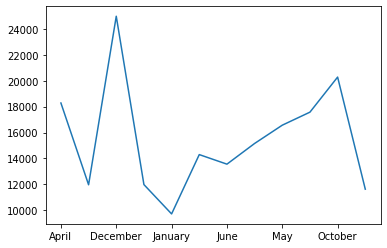

In [100]:
dff['Order_Date_month'].value_counts(dropna=False).sort_index().plot()

# Distribution of Orders over days

*   List item
*   List item



In [101]:
dff['Order_Date_day'] = dff['Order_Date_parsed'].dt.day
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25


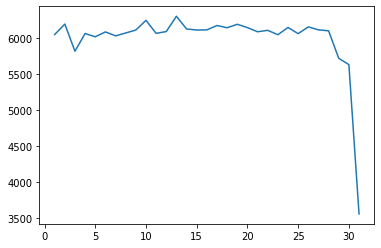

In [102]:
dff['Order_Date_day'].value_counts().sort_index().plot()

# Distribution of Orders over days of the week


In [109]:
dff['Order_Date_parsed_day_of_week'] = dff.loc[:,'Order_Date_parsed'].apply(lambda x: calendar.day_name[x.weekday()])
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday


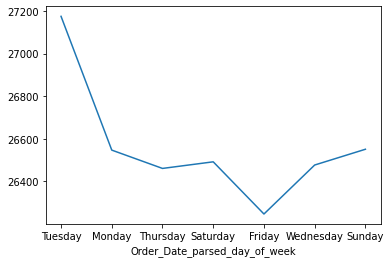

In [115]:
dff.groupby('Order_Date_parsed_day_of_week', sort=False)['Order ID'].count().plot()

# Value of the Orders

In [119]:
dff['Order_value'] = dff.loc[:,'Quantity Ordered'].astype(float) * dff.loc[:,'Price Each'].astype(float)
dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_zipcode,Purchase_state,Purchase_city,Order_Date_parsed,Order_Date_month,Order_Date_day,Order_Date_parsed_day_of_week,Order_value
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",02215,MA,Boston,2019-01-22 21:25:00,January,22,Tuesday,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",97035,OR,Portland,2019-01-28 14:15:00,January,28,Monday,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",94016,CA,San Francisco,2019-01-17 13:33:00,January,17,Thursday,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",90001,CA,Los Angeles,2019-01-05 20:33:00,January,5,Saturday,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",73301,TX,Austin,2019-01-25 11:59:00,January,25,Friday,11.99


# States with total value of orders

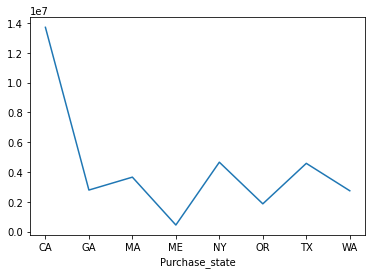

In [120]:
dff.groupby('Purchase_state')['Order_value'].sum().plot()

In [121]:
len(dff['Purchase_state'].unique())

8

# Months with total value of Orders

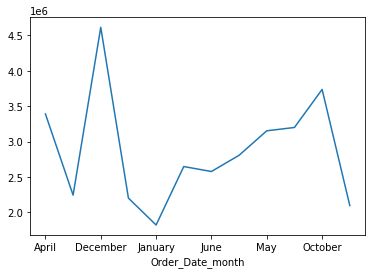

In [122]:
dff.groupby('Order_Date_month')['Order_value'].sum().plot()